In [1111]:
import sys
import numpy as np
import pandas as pd
from pandas               import DataFrame
from pandas               import read_csv
from numpy                import array
from numpy                import random
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics      import auc
from sklearn.metrics      import roc_auc_score
from matplotlib           import pyplot
import openpyxl
from pathlib import Path
from datetime import datetime
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from scipy.stats          import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

In [1112]:
#read in all csvs and create dataframes respectively

campaigns = pd.read_csv("C:/Users/dkestenbaum/Desktop/PDA_GROUP ASSIGNMENT DSC use-case-20211201/campaigns.csv",sep=';')

donors = pd.read_csv("C:/Users/dkestenbaum/Desktop/PDA_GROUP ASSIGNMENT DSC use-case-20211201/donors.csv")

gifts = pd.read_csv("C:/Users/dkestenbaum/Desktop/PDA_GROUP ASSIGNMENT DSC use-case-20211201/gifts.csv")



In [1113]:
campaigns.head()

,campaignID,date,lettersSent,CostUnit
0,153,13/12/2004,6 873,"0,17 €"
1,154,01/01/2005,7 656,"0,30 €"
2,180,18/01/2005,9 933,"0,20 €"
3,433,29/01/2005,7 448,"0,59 €"
4,476,12/02/2005,6 605,"0,51 €"


In [1114]:
campaigns.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   campaignID   367 non-null    int64 
 1   date         367 non-null    object
 2   lettersSent  367 non-null    object
 3   CostUnit     367 non-null    object
dtypes: int64(1), object(3)
memory usage: 11.6+ KB


In [1115]:
campaigns.dtypes

campaignID      int64
date           object
lettersSent    object
CostUnit       object
dtype: object

# Data Cleaning 

In [1116]:
#transform date column to datetime

campaigns['date'] = pd.to_datetime(campaigns['date'])

campaigns.dtypes

campaignID              int64
date           datetime64[ns]
lettersSent            object
CostUnit               object
dtype: object

In [1117]:
campaigns.head()

,campaignID,date,lettersSent,CostUnit
0,153,2004-12-13,6 873,"0,17 €"
1,154,2005-01-01,7 656,"0,30 €"
2,180,2005-01-18,9 933,"0,20 €"
3,433,2005-01-29,7 448,"0,59 €"
4,476,2005-12-02,6 605,"0,51 €"


In [1118]:
#transform lettersSent to type int 

campaigns['lettersSent'] = campaigns['lettersSent'].str.replace("\u202f", "")

campaigns['lettersSent'] = campaigns['lettersSent'].astype('int')

campaigns.dtypes

campaignID              int64
date           datetime64[ns]
lettersSent             int32
CostUnit               object
dtype: object

In [1119]:
#reformat costunit and transform to float 

campaigns['CostUnit'] = campaigns['CostUnit'].str.replace("€","")
campaigns['CostUnit'] = campaigns['CostUnit'].str.replace(",",".")
campaigns['CostUnit'] = campaigns['CostUnit'].astype(float)

In [1120]:
campaigns.rename(columns={"CostUnit":"CostUnit (Euros)", "date":"campaign date"},inplace=True)

In [1121]:
campaigns['campaignID'] = campaigns['campaignID'].astype(str)

In [1122]:
campaigns.dtypes

campaignID                  object
campaign date       datetime64[ns]
lettersSent                  int32
CostUnit (Euros)           float64
dtype: object

In [1123]:
#rename columns to campaign specific col names
campaigns.rename(columns={"lettersSent":"campaign_lettersSent","CostUnit (Euros)":"campaign_cost_per_unit"},inplace=True)

In [1124]:
campaigns_6169 = campaigns[campaigns['campaignID']=='6169']

In [1125]:
campaigns_6169.head()

,campaignID,campaign date,campaign_lettersSent,campaign_cost_per_unit
335,6169,2018-04-09,34888,0.87


In [1126]:
donors.head()

,Unnamed: 0,donorID,zipcode,province,region,gender,language,dateOfBirth
0,0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [1127]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44691 entries, 0 to 44690
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   44691 non-null  int64  
 1   donorID      44691 non-null  int64  
 2   zipcode      44689 non-null  float64
 3   province     44691 non-null  object 
 4   region       44691 non-null  object 
 5   gender       44659 non-null  object 
 6   language     44691 non-null  object 
 7   dateOfBirth  44691 non-null  object 
dtypes: float64(1), int64(2), object(5)
memory usage: 2.7+ MB


# Data Cleaning & Feature Engineering

In [1128]:
#drop old index column

donors.drop(['Unnamed: 0'],inplace=True, axis=1)

donors.head()

,donorID,zipcode,province,region,gender,language,dateOfBirth
0,100001,1861.0,Flemish Brabant,Flanders,F,NL,12/24/1967
1,100002,2260.0,Antwerp,Flanders,M,NL,01/14/1952
2,100003,1780.0,Flemish Brabant,Flanders,M,NL,12/23/1986
3,100004,1020.0,Brussels,Brussels,F,FR,03/29/1952
4,100005,1020.0,Brussels,Brussels,F,FR,06/25/1986


In [1129]:
#drop the two na values in zipcode column
donors.dropna(subset = ['zipcode'], inplace=True)

In [1130]:
donors['zipcode'] = donors['zipcode'].astype(float)
donors['zipcode'] = donors['zipcode'].astype(int)
donors['zipcode'] = donors['zipcode'].astype(str)

In [1131]:
#transform date column to datetime

donors['dateOfBirth'] = pd.to_datetime(donors['dateOfBirth'])

In [1132]:
donors.dtypes

donorID                 int64
zipcode                object
province               object
region                 object
gender                 object
language               object
dateOfBirth    datetime64[ns]
dtype: object

In [1133]:
donors['province'].value_counts()

Antwerp            10293
East Flanders       9137
West Flanders       8964
Flemish Brabant     6781
Limburg             4818
Brussels            1488
Liege                970
Hainaut              944
Walloon Brabant      433
Namur                401
Luxembourg           303
ANTWERP              157
Name: province, dtype: int64

In [1134]:
donors['province'] = np.where(donors['province'] == 'ANTWERP','Antwerp',donors['province'])

In [1135]:
donors['province'].value_counts()

Antwerp            10450
East Flanders       9137
West Flanders       8964
Flemish Brabant     6781
Limburg             4818
Brussels            1488
Liege                970
Hainaut              944
Walloon Brabant      433
Namur                401
Luxembourg           303
Name: province, dtype: int64

In [1136]:
donors['region'].value_counts()

Flanders    40150
Wallonia     3051
Brussels     1488
Name: region, dtype: int64

In [1137]:
donors['language'].value_counts()

NL    40063
FR     4622
EN        4
Name: language, dtype: int64

In [1138]:
donors['gender'].value_counts()

M    25790
F    18867
Name: gender, dtype: int64

In [1139]:
#create third gender category for undisclosed gender

donors['gender'] = np.where(donors['gender'].isnull(),'undisclosed',donors['gender'])

In [1140]:
donors['gender'].value_counts()

M              25790
F              18867
undisclosed       32
Name: gender, dtype: int64

In [1141]:
donors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44689 entries, 0 to 44690
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   donorID      44689 non-null  int64         
 1   zipcode      44689 non-null  object        
 2   province     44689 non-null  object        
 3   region       44689 non-null  object        
 4   gender       44689 non-null  object        
 5   language     44689 non-null  object        
 6   dateOfBirth  44689 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 2.7+ MB


In [1142]:
#rename columns to donor specific names
donors.rename(columns={"zipcode":"donors_zip","province":"donors_province","region":"donors_region","gender":"donors_gender","language":"donors_language","dateOfBirth":"donors_DOB"},inplace=True)

In [1143]:
donors.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB
0,100001,1861,Flemish Brabant,Flanders,F,NL,1967-12-24
1,100002,2260,Antwerp,Flanders,M,NL,1952-01-14
2,100003,1780,Flemish Brabant,Flanders,M,NL,1986-12-23
3,100004,1020,Brussels,Brussels,F,FR,1952-03-29
4,100005,1020,Brussels,Brussels,F,FR,1986-06-25


In [1144]:
donors["yob"] = donors['donors_DOB'].astype(str).str[:4].astype(int)
donors["age"] = 2018 - donors["yob"]
donors.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB,yob,age
0,100001,1861,Flemish Brabant,Flanders,F,NL,1967-12-24,1967,51
1,100002,2260,Antwerp,Flanders,M,NL,1952-01-14,1952,66
2,100003,1780,Flemish Brabant,Flanders,M,NL,1986-12-23,1986,32
3,100004,1020,Brussels,Brussels,F,FR,1952-03-29,1952,66
4,100005,1020,Brussels,Brussels,F,FR,1986-06-25,1986,32


In [1145]:
donors['donorID'] = donors['donorID'].astype(str)

In [1146]:
donors.dtypes

donorID                    object
donors_zip                 object
donors_province            object
donors_region              object
donors_gender              object
donors_language            object
donors_DOB         datetime64[ns]
yob                         int32
age                         int32
dtype: object

In [1147]:
#encoding for categoricals

l_province = LabelEncoder()
donors["donors_province"] = l_province.fit_transform(donors["donors_province"])

l_region = LabelEncoder()
donors["donors_region"] = l_region.fit_transform(donors["donors_region"])

l_gender = LabelEncoder()
donors["donors_gender"] = l_gender.fit_transform(donors["donors_gender"])

l_language = LabelEncoder()
donors["donors_language"] = l_language.fit_transform(donors["donors_language"])

In [1148]:
donors.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB,yob,age
0,100001,1861,3,1,0,2,1967-12-24,1967,51
1,100002,2260,0,1,1,2,1952-01-14,1952,66
2,100003,1780,3,1,1,2,1986-12-23,1986,32
3,100004,1020,1,0,0,1,1952-03-29,1952,66
4,100005,1020,1,0,0,1,1986-06-25,1986,32


In [1149]:
gifts.head()

,Unnamed: 0,donorID,campaignID,amount,date
0,0,100001,NaN,"12,39",2004-03-23
1,1,100001,1577.0,"12,39",2007-10-11
2,2,100001,1634.0,"6,69",2007-12-28
3,3,100001,1778.0,"24,79",2008-06-14
4,4,100001,1808.0,"7,44",2008-07-09


In [1150]:
#drop Unnamed: 0 column

gifts.drop(['Unnamed: 0'],inplace=True, axis=1)

In [1151]:
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   donorID     216594 non-null  int64  
 1   campaignID  200957 non-null  float64
 2   amount      216594 non-null  object 
 3   date        216594 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 6.6+ MB


In [1152]:
#transform donation date to datetime
gifts['date'] = pd.to_datetime(gifts['date'])

In [1153]:
#transform amount column to correct format and float type

gifts['amount'] = gifts['amount'].str.replace(",",".")
gifts['amount'] = gifts['amount'].astype(float)

In [1154]:
#convert campaignId type to int in order to get rid of float point 
#preliminary step is converting NaN to 0 
#convert 0 (missing) to no_campaign
gifts['campaignID'] = np.where(gifts['campaignID'].isnull(), 0 ,gifts['campaignID'])
gifts['campaignID'] = gifts['campaignID'].astype(int)
gifts['campaignID'] = gifts['campaignID'].astype(str)

In [1155]:
gifts['campaignID'] = np.where(gifts['campaignID'] == '0', "no_campaign", gifts['campaignID'])

In [1156]:
gifts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216594 entries, 0 to 216593
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   donorID     216594 non-null  int64         
 1   campaignID  216594 non-null  object        
 2   amount      216594 non-null  float64       
 3   date        216594 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.6+ MB


In [1157]:
gifts['donorID'] = gifts['donorID'].astype(str)

In [1158]:
gifts.dtypes

donorID               object
campaignID            object
amount               float64
date          datetime64[ns]
dtype: object

In [1159]:
gifts.rename(columns={"donorID":"donation_donorID","campaignID":"donation_campaignID","amount":"donation_amount","date":"donation_date"},inplace=True)

In [1160]:
gifts.head()

,donation_donorID,donation_campaignID,donation_amount,donation_date
0,100001,no_campaign,12.39,2004-03-23
1,100001,1577,12.39,2007-10-11
2,100001,1634,6.69,2007-12-28
3,100001,1778,24.79,2008-06-14
4,100001,1808,7.44,2008-07-09


In [1161]:
#create cut off date object 
#filter 6169 gifts dataframe for only dates before cut off in order to prevent data leakage

date = '20180804'
cut_off_date_6169 = datetime.strptime(date,'%Y%m%d')
gifts_6169 = gifts[gifts['donation_date'] < cut_off_date_6169]

In [1162]:
#groupby to aggregate most recent donation date
recency6169 = gifts_6169.groupby(by="donation_donorID").agg({'donation_date': 'max'}).reset_index()

In [1163]:
recency6169.rename(columns = {"donation_date":"recency"},inplace=True)

In [1164]:
recency6169.head()

,donation_donorID,recency
0,100001,2011-12-30
1,100002,2015-01-10
2,100003,2018-07-08
3,100004,2011-06-03
4,100005,2018-06-19


In [1165]:
gifts_6169.dtypes

donation_donorID               object
donation_campaignID            object
donation_amount               float64
donation_date          datetime64[ns]
dtype: object

In [1166]:
gifts_donations_cut_off_6169 = gifts_6169.groupby('donation_donorID').agg({'donation_amount': ['sum','mean','median','max','min','count']}).reset_index()
gifts_donations_cut_off_6169.columns = ['donation_donorID','donation_total_co','donation_average_co','donation_median_co','donation_max_co','donation_min_co','donation_cu']
gifts_donations_cut_off_6169.head()

,donation_donorID,donation_total_co,donation_average_co,donation_median_co,donation_max_co,donation_min_co,donation_cu
0,100001,178.49,14.874167,11.195,30.00,6.69,12
1,100002,20.00,20.000000,20.000,20.00,20.00,1
2,100003,18.00,3.600000,3.000,5.00,3.00,5
3,100004,716.22,27.546923,24.790,49.58,24.79,26
4,100005,14.96,3.740000,3.740,5.00,2.48,4


In [1167]:
gifts_donations_cut_off_6169['donation_donorID'] = gifts_donations_cut_off_6169['donation_donorID'].astype(str)

In [1168]:
gifts_donation_cut_off_6169 = gifts_donations_cut_off_6169.merge(recency6169, on="donation_donorID",how="left")

In [1169]:
gifts_donation_cut_off_6169.head()

,donation_donorID,donation_total_co,donation_average_co,donation_median_co,donation_max_co,donation_min_co,donation_cu,recency
0,100001,178.49,14.874167,11.195,30.00,6.69,12,2011-12-30
1,100002,20.00,20.000000,20.000,20.00,20.00,1,2015-01-10
2,100003,18.00,3.600000,3.000,5.00,3.00,5,2018-07-08
3,100004,716.22,27.546923,24.790,49.58,24.79,26,2011-06-03
4,100005,14.96,3.740000,3.740,5.00,2.48,4,2018-06-19


In [1170]:
#merge orginial gifts dataframe with newly computed features 

donations_train_6169 = gifts.merge(gifts_donation_cut_off_6169, on='donation_donorID',how='left')
donations_train_6169.head()

,donation_donorID,donation_campaignID,donation_amount,donation_date,donation_total_co,donation_average_co,donation_median_co,donation_max_co,donation_min_co,donation_cu,recency
0,100001,no_campaign,12.39,2004-03-23,178.49,14.874167,11.195,30.0,6.69,12.0,2011-12-30
1,100001,1577,12.39,2007-10-11,178.49,14.874167,11.195,30.0,6.69,12.0,2011-12-30
2,100001,1634,6.69,2007-12-28,178.49,14.874167,11.195,30.0,6.69,12.0,2011-12-30
3,100001,1778,24.79,2008-06-14,178.49,14.874167,11.195,30.0,6.69,12.0,2011-12-30
4,100001,1808,7.44,2008-07-09,178.49,14.874167,11.195,30.0,6.69,12.0,2011-12-30


In [1171]:
donations_train_6169.dtypes

donation_donorID               object
donation_campaignID            object
donation_amount               float64
donation_date          datetime64[ns]
donation_total_co             float64
donation_average_co           float64
donation_median_co            float64
donation_max_co               float64
donation_min_co               float64
donation_cu                   float64
recency                datetime64[ns]
dtype: object

# Merge All Dfs

In [1172]:
donations_train_6169 = donors.merge(donations_train_6169,left_on='donorID',right_on='donation_donorID', how='inner')



In [1173]:
donations_train_6169 = donations_train_6169.merge(campaigns_6169, left_on='donation_campaignID', right_on='campaignID', how='left')

In [1174]:
donations_train_6169.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 216567 entries, 0 to 216566
Data columns (total 24 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   donorID                 216567 non-null  object        
 1   donors_zip              216567 non-null  object        
 2   donors_province         216567 non-null  int32         
 3   donors_region           216567 non-null  int32         
 4   donors_gender           216567 non-null  int32         
 5   donors_language         216567 non-null  int32         
 6   donors_DOB              216567 non-null  datetime64[ns]
 7   yob                     216567 non-null  int32         
 8   age                     216567 non-null  int32         
 9   donation_donorID        216567 non-null  object        
 10  donation_campaignID     216567 non-null  object        
 11  donation_amount         216567 non-null  float64       
 12  donation_date           216567

In [1175]:
#donations_train_6169.drop(['campaignID_y','campaign date_y','campaign_lettersSent_y','campaign_cost_per_unit_y'],inplace=True,axis=1)

# Create Dependent Variable

In [1176]:
#target variable creation, 1 where donor made donation to 6169 and the amount was >= to 30 euros

donations_train_6169['donated_to_6169'] = np.where((donations_train_6169['donation_campaignID'] == '6169') & (donations_train_6169['donation_amount'] >= 30.0),1,0)

In [1177]:

donations_train_6169['donated_to_6169'].value_counts()

0    215618
1       949
Name: donated_to_6169, dtype: int64

In [1178]:
donations_train_6169.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB,yob,age,donation_donorID,...,donation_median_co,donation_max_co,donation_min_co,donation_cu,recency,campaignID,campaign date,campaign_lettersSent,campaign_cost_per_unit,donated_to_6169
0,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.0,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
1,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.0,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
2,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.0,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
3,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.0,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
4,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.0,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0


In [1179]:
#isolate target variable values of 1 for 6169 campaign

donations_1_6169 = donations_train_6169[donations_train_6169['donated_to_6169'] == 1]

In [1180]:
#drop duplicates for proper granularity

donations_1_6169.drop_duplicates(subset='donation_donorID',inplace=True)

<ipython-input-1180-63e84b436a2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donations_1_6169.drop_duplicates(subset='donation_donorID',inplace=True)


In [1181]:
#isolate target variable values of 0 

donations_0_6169 = donations_train_6169[donations_train_6169['donated_to_6169']== 0]

In [1182]:
donations_0_6169.drop_duplicates(subset='donation_donorID',inplace=True)

<ipython-input-1182-08ff7d5c3369>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donations_0_6169.drop_duplicates(subset='donation_donorID',inplace=True)


In [1183]:
donations_0_6169.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB,yob,age,donation_donorID,...,donation_median_co,donation_max_co,donation_min_co,donation_cu,recency,campaignID,campaign date,campaign_lettersSent,campaign_cost_per_unit,donated_to_6169
0,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.00,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
12,100002,2260,0,1,1,2,1952-01-14,1952,66,100002,...,20.000,20.00,20.00,1.0,2015-01-10,NaN,NaT,NaN,NaN,0
13,100003,1780,3,1,1,2,1986-12-23,1986,32,100003,...,3.000,5.00,3.00,5.0,2018-07-08,NaN,NaT,NaN,NaN,0
25,100004,1020,1,0,0,1,1952-03-29,1952,66,100004,...,24.790,49.58,24.79,26.0,2011-06-03,NaN,NaT,NaN,NaN,0
51,100005,1020,1,0,0,1,1986-06-25,1986,32,100005,...,3.740,5.00,2.48,4.0,2018-06-19,NaN,NaT,NaN,NaN,0


In [1184]:
#concatenate the dataframes for both isolated target variable values dfs

donations_train_6169 = pd.concat([donations_0_6169,donations_1_6169],axis=0)

In [1185]:
donations_train_6169.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB,yob,age,donation_donorID,...,donation_median_co,donation_max_co,donation_min_co,donation_cu,recency,campaignID,campaign date,campaign_lettersSent,campaign_cost_per_unit,donated_to_6169
0,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.00,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
12,100002,2260,0,1,1,2,1952-01-14,1952,66,100002,...,20.000,20.00,20.00,1.0,2015-01-10,NaN,NaT,NaN,NaN,0
13,100003,1780,3,1,1,2,1986-12-23,1986,32,100003,...,3.000,5.00,3.00,5.0,2018-07-08,NaN,NaT,NaN,NaN,0
25,100004,1020,1,0,0,1,1952-03-29,1952,66,100004,...,24.790,49.58,24.79,26.0,2011-06-03,NaN,NaT,NaN,NaN,0
51,100005,1020,1,0,0,1,1986-06-25,1986,32,100005,...,3.740,5.00,2.48,4.0,2018-06-19,NaN,NaT,NaN,NaN,0


In [1186]:
#sanity check

donations_train_6169['donated_to_6169'].value_counts()

0    44684
1      949
Name: donated_to_6169, dtype: int64

In [1187]:
donations_train_6169.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB,yob,age,donation_donorID,...,donation_median_co,donation_max_co,donation_min_co,donation_cu,recency,campaignID,campaign date,campaign_lettersSent,campaign_cost_per_unit,donated_to_6169
0,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.00,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
12,100002,2260,0,1,1,2,1952-01-14,1952,66,100002,...,20.000,20.00,20.00,1.0,2015-01-10,NaN,NaT,NaN,NaN,0
13,100003,1780,3,1,1,2,1986-12-23,1986,32,100003,...,3.000,5.00,3.00,5.0,2018-07-08,NaN,NaT,NaN,NaN,0
25,100004,1020,1,0,0,1,1952-03-29,1952,66,100004,...,24.790,49.58,24.79,26.0,2011-06-03,NaN,NaT,NaN,NaN,0
51,100005,1020,1,0,0,1,1986-06-25,1986,32,100005,...,3.740,5.00,2.48,4.0,2018-06-19,NaN,NaT,NaN,NaN,0


In [1188]:
donations_train_6169.drop(['donation_date','donation_amount'],axis=1,inplace=True)

In [1189]:
donations_train_6169.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB,yob,age,donation_donorID,...,donation_median_co,donation_max_co,donation_min_co,donation_cu,recency,campaignID,campaign date,campaign_lettersSent,campaign_cost_per_unit,donated_to_6169
0,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.00,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
12,100002,2260,0,1,1,2,1952-01-14,1952,66,100002,...,20.000,20.00,20.00,1.0,2015-01-10,NaN,NaT,NaN,NaN,0
13,100003,1780,3,1,1,2,1986-12-23,1986,32,100003,...,3.000,5.00,3.00,5.0,2018-07-08,NaN,NaT,NaN,NaN,0
25,100004,1020,1,0,0,1,1952-03-29,1952,66,100004,...,24.790,49.58,24.79,26.0,2011-06-03,NaN,NaT,NaN,NaN,0
51,100005,1020,1,0,0,1,1986-06-25,1986,32,100005,...,3.740,5.00,2.48,4.0,2018-06-19,NaN,NaT,NaN,NaN,0


In [1190]:
donations_train_6169.dtypes

donorID                           object
donors_zip                        object
donors_province                    int32
donors_region                      int32
donors_gender                      int32
donors_language                    int32
donors_DOB                datetime64[ns]
yob                                int32
age                                int32
donation_donorID                  object
donation_campaignID               object
donation_total_co                float64
donation_average_co              float64
donation_median_co               float64
donation_max_co                  float64
donation_min_co                  float64
donation_cu                      float64
recency                   datetime64[ns]
campaignID                        object
campaign date             datetime64[ns]
campaign_lettersSent             float64
campaign_cost_per_unit           float64
donated_to_6169                    int32
dtype: object

In [1191]:
#this function returns a basetable for a campaign based on the campaigns ID and the cut off date for the features as well
#as the specified target variable

def get_basetable(campaign_id: [str], date_Y_m_d: [str], target_var_name: [str]):
    
    global campaigns
    
    name_of_campaigns_df = campaigns[campaigns['campaignID']== campaign_id]
    
    date = date_Y_m_d
    
    cut_off_date = datetime.strptime(date,'%Y%m%d')
    
    global gifts
    
    gifts_cut_off = gifts[gifts['donation_date'] < cut_off_date]
    
    gifts_donations = gifts_cut_off.groupby('donation_donorID').agg({'donation_amount': ['sum','mean','median','max','min','count']}).reset_index()
    
    gifts_donations.columns = ['donation_donorID','donation_total_co','donation_average_co','donation_median_co','donation_max_co','donation_min_co','donation_cu']
    
    recency = gifts_cut_off.groupby(by="donation_donorID").agg({'donation_date': 'max'}).reset_index()
    
    recency.rename(columns = {"donation_date":"recency"},inplace=True)
    
    gifts_donation_all = gifts_donations.merge(recency, on="donation_donorID",how="left")
    
    donations_train = gifts.merge(gifts_donation_all, on='donation_donorID',how='left')
    
    global donors
    
    donations_train = donors.merge(donations_train,left_on='donorID',right_on='donation_donorID', how='left')
    
    donations_train = donations_train.merge(name_of_campaigns_df, left_on='donation_campaignID', right_on='campaignID', how='left')
    
    donations_train[target_var_name] = np.where((donations_train['donation_campaignID'] == campaign_id) & (donations_train['donation_amount'] >= 30.0),1,0)
    
    donations_1 = donations_train[donations_train[target_var_name] == 1]
    
    donations_1.drop_duplicates(subset='donation_donorID',inplace=True)
    
    donations_0 = donations_train[donations_train[target_var_name]== 0]
    
    donations_0.drop_duplicates(subset='donation_donorID',inplace=True)
    
    donations_train = pd.concat([donations_0,donations_1],axis=0)
    
    donations_train.drop(['donation_date','donation_amount'],axis=1,inplace=True)
    
    return donations_train

In [1192]:
donations_train_7244 = get_basetable(campaign_id="7244",date_Y_m_d='20190518', target_var_name='donated_to_7244')

<ipython-input-1191-56138ae0590c>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donations_1.drop_duplicates(subset='donation_donorID',inplace=True)
<ipython-input-1191-56138ae0590c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donations_0.drop_duplicates(subset='donation_donorID',inplace=True)


In [1193]:
donations_train_7244.head()

,donorID,donors_zip,donors_province,donors_region,donors_gender,donors_language,donors_DOB,yob,age,donation_donorID,...,donation_median_co,donation_max_co,donation_min_co,donation_cu,recency,campaignID,campaign date,campaign_lettersSent,campaign_cost_per_unit,donated_to_7244
0,100001,1861,3,1,0,2,1967-12-24,1967,51,100001,...,11.195,30.00,6.69,12.0,2011-12-30,NaN,NaT,NaN,NaN,0
12,100002,2260,0,1,1,2,1952-01-14,1952,66,100002,...,20.000,20.00,20.00,1.0,2015-01-10,NaN,NaT,NaN,NaN,0
13,100003,1780,3,1,1,2,1986-12-23,1986,32,100003,...,4.000,5.00,3.00,11.0,2019-05-06,NaN,NaT,NaN,NaN,0
25,100004,1020,1,0,0,1,1952-03-29,1952,66,100004,...,24.790,49.58,24.79,26.0,2011-06-03,NaN,NaT,NaN,NaN,0
51,100005,1020,1,0,0,1,1986-06-25,1986,32,100005,...,5.000,10.00,2.48,5.0,2019-04-18,NaN,NaT,NaN,NaN,0


In [1195]:
donations_train_7244['donated_to_7244'].value_counts()

0    44685
1      217
Name: donated_to_7244, dtype: int64

In [1196]:
donations_train_7244.drop(3356,axis=0,inplace=True)

In [1197]:
#convert recency datetime type to ordinal numeric value for model fitting and predicting 

donations_train_6169['recency'] = donations_train_6169['recency'].apply(lambda x:x.toordinal())
donations_train_7244['recency'] = donations_train_7244['recency'].apply(lambda x:x.toordinal())

# Subsetting for Selection Campaigns


In [1198]:
selection_campaign_6169 = pd.read_csv('C:/Users/dkestenbaum/Desktop/PDA_GROUP ASSIGNMENT DSC use-case-20211201/selection campaign 6169.csv')

In [1199]:
selection_campaign_6169['donorID'] = selection_campaign_6169['donorID'].astype(str)

In [1200]:
donations_train_6169_selected = donations_train_6169.merge(selection_campaign_6169,on='donorID',how='inner')

In [1201]:
donations_train_6169_selected['donated_to_6169'].value_counts()

0    34867
1      949
Name: donated_to_6169, dtype: int64

In [1202]:
selection_campaign_7244 = pd.read_csv('C:/Users/dkestenbaum/Desktop/PDA_GROUP ASSIGNMENT DSC use-case-20211201/selection campaign 7244.csv')

In [1203]:
selection_campaign_7244['donorID'] = selection_campaign_7244['donorID'].astype(str)

In [1204]:
donations_train_7244_selected = donations_train_7244.merge(selection_campaign_7244,on='donorID',how='inner')

In [1205]:
donations_train_7244_selected['donated_to_7244'].value_counts()

0    25643
1      217
Name: donated_to_7244, dtype: int64

In [1206]:
X_train_6169 = donations_train_6169_selected.drop('donated_to_6169',axis=1)
y_train_6169 = donations_train_6169_selected['donated_to_6169']

In [1207]:
X_train_6169.columns

Index(['donorID', 'donors_zip', 'donors_province', 'donors_region',
       'donors_gender', 'donors_language', 'donors_DOB', 'yob', 'age',
       'donation_donorID', 'donation_campaignID', 'donation_total_co',
       'donation_average_co', 'donation_median_co', 'donation_max_co',
       'donation_min_co', 'donation_cu', 'recency', 'campaignID',
       'campaign date', 'campaign_lettersSent', 'campaign_cost_per_unit'],
      dtype='object')

In [1208]:
X_train_6169_features = X_train_6169[['donorID', 'donors_zip', 'donors_province', 'donors_region',
       'donors_gender', 'donors_language', 'donors_DOB', 'yob', 'age',
       'donation_donorID', 'donation_campaignID', 'donation_total_co',
       'donation_average_co', 'donation_median_co', 'donation_max_co',
       'donation_min_co', 'donation_cu', 'campaignID', 'campaign date',
       'campaign_lettersSent', 'campaign_cost_per_unit','recency']]

In [1209]:
donations_train_7244_selected.drop('age',inplace=True,axis=1)

In [1210]:
donations_train_7244_selected['age'] = 2019 - donations_train_7244_selected['yob']

In [1211]:
X_test_7244 = donations_train_7244_selected.drop("donated_to_7244",axis=1)
y_test_7244 = donations_train_7244_selected['donated_to_7244']

In [1212]:
X_test_7244_features = X_test_7244[['donorID', 'donors_zip', 'donors_province', 'donors_region',
       'donors_gender', 'donors_language', 'donors_DOB', 'yob', 'age',
       'donation_donorID', 'donation_campaignID', 'donation_total_co',
       'donation_average_co', 'donation_median_co', 'donation_max_co',
       'donation_min_co', 'donation_cu', 'campaignID', 'campaign date',
       'campaign_lettersSent', 'campaign_cost_per_unit','recency']]

In [1213]:
#sourced from in-class notebook 

selectedFeatures = []
target = "donated_to_6169"

for column in X_train_6169_features.columns:
    if column not in ("donorID","donated_to_6169","donation_donorID","donors_zip","donation_donorID","donation_campaignID",
                     "campaignID","campaign date","donors_DOB","campaign_lettersSent","campaign_cost_per_unit"):
        (pearson,pvalue) = pearsonr(X_train_6169_features[column],donations_train_6169_selected[target])
        print(f"{column} - p-vlue = {pvalue} - selected : {1 if pvalue < 0.001 else 0}")
        if pvalue < 0.001:
            selectedFeatures.append(column)

donors_province - p-vlue = 0.8825083737098818 - selected : 0
donors_region - p-vlue = 0.6088877489449505 - selected : 0
donors_gender - p-vlue = 4.708415860835804e-87 - selected : 1
donors_language - p-vlue = 0.009737361757311474 - selected : 0
yob - p-vlue = 7.778148317006798e-80 - selected : 1
age - p-vlue = 7.778148317020947e-80 - selected : 1
donation_total_co - p-vlue = 0.8493851916227793 - selected : 0
donation_average_co - p-vlue = 0.8221498187168728 - selected : 0
donation_median_co - p-vlue = 0.8225723745903779 - selected : 0
donation_max_co - p-vlue = 0.8239891832141767 - selected : 0
donation_min_co - p-vlue = 0.8751607723583259 - selected : 0
donation_cu - p-vlue = 0.2942420776815557 - selected : 0
recency - p-vlue = 6.371543747115007e-08 - selected : 1


In [1214]:
X_train_6169_features = X_train_6169_features[['donors_province','donors_region','donors_gender','donors_language','yob','age','donation_total_co','donation_average_co','donation_median_co','donation_max_co','donation_min_co','donation_cu','recency']]

In [1215]:
X_test_7244_features = X_test_7244[['donors_province','donors_region','donors_gender','donors_language','yob','age','donation_total_co','donation_average_co','donation_median_co','donation_max_co','donation_min_co','donation_cu','recency']]

# Model 1: Logestion Regression

In [1216]:
model = LogisticRegression(solver = "lbfgs", max_iter = 500)

In [1217]:
#test set

model_test_1 = model.fit(X_train_6169_features,y_train_6169)

In [1218]:
DataFrame(model_test_1.predict_proba(X_test_7244_features))[1]

0        0.024481
1        0.041750
2        0.063766
3        0.086511
4        0.014615
           ...   
25855    0.015484
25856    0.013792
25857    0.028043
25858    0.018557
25859    0.012912
Name: 1, Length: 25860, dtype: float64

In [1219]:
X_test_7244_features["proba donated"] = DataFrame(model_test_1.predict_proba(X_test_7244_features))[1]

<ipython-input-1219-6a61b1451721>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_7244_features["proba donated"] = DataFrame(model_test_1.predict_proba(X_test_7244_features))[1]


In [1220]:
X_train, X_test_6169, y_train, y_test_6169 = train_test_split(X_train_6169, y_train_6169,test_size=.3, random_state=0,stratify=y_train_6169)

In [1221]:
X_train1 = X_train[['donors_province','donors_region','donors_gender','donors_language','yob','age','donation_total_co','donation_average_co','donation_median_co','donation_max_co','donation_min_co','donation_cu','recency']]
X_test_6169_1 = X_test_6169[['donors_province','donors_region','donors_gender','donors_language','yob','age','donation_total_co','donation_average_co','donation_median_co','donation_max_co','donation_min_co','donation_cu','recency']]

In [1222]:
#train set

model_train_1 = model.fit(X_train1,y_train)

In [1223]:
#train set

X_test_6169["proba donated"] = DataFrame(model_train_1.predict_proba(X_test_6169_1))[1]

In [1224]:
#impute NAN

X_test_6169['proba donated'] = np.where(X_test_6169["proba donated"].isnull(),0.0,X_test_6169['proba donated'])

In [1225]:
X_test_6169['proba donated']

29972    0.000000
9245     0.025339
10115    0.026092
34864    0.000000
20753    0.000000
           ...   
5637     0.025777
1181     0.025705
2360     0.026011
33427    0.000000
3150     0.025347
Name: proba donated, Length: 10745, dtype: float64

# Scores 1

In [1226]:
aucTrain = roc_auc_score(array(y_test_6169),array(X_test_6169["proba donated"]))
aucTest     = roc_auc_score(array(donations_train_7244_selected['donated_to_7244']),array(X_test_7244_features["proba donated"]))

print(aucTrain)
print(aucTest)

0.5290711482338734
0.5490260544868921


Isolating features 

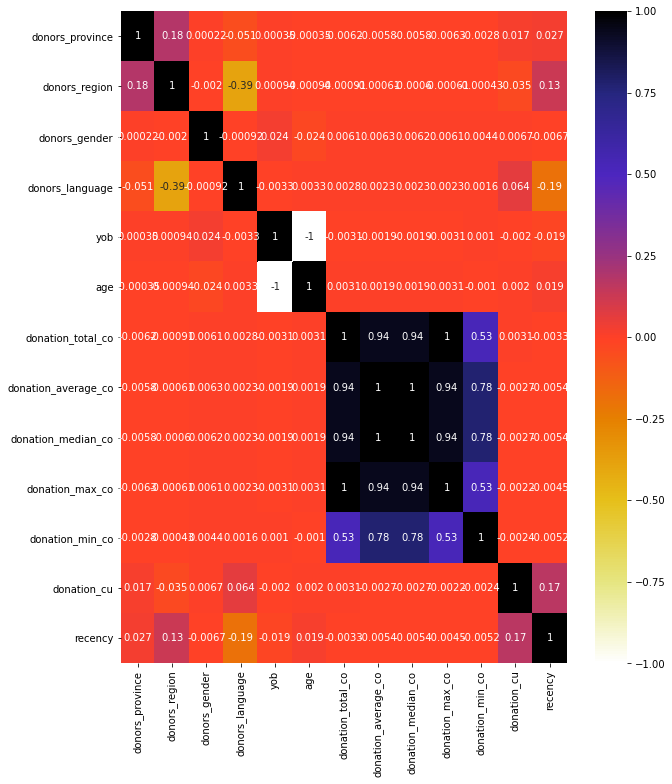

In [1227]:
#pearson correlation matrix to explore feature correlation

plt.figure(figsize=(10,12))
cor = X_train_6169_features.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [1228]:
#sourced from sklearn documentation
def correlation(dataset, threshold):
    col_corr = set() # Set of all names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [1229]:
corr_features = correlation(X_train_6169_features, 0.7)
len(set(corr_features))

5

In [1230]:
corr_features

{'age',
 'donation_average_co',
 'donation_max_co',
 'donation_median_co',
 'donation_min_co'}

In [1231]:
X_train_6169_features = X_train_6169_features[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','donation_cu']]

In [1232]:
X_test_7244_features = X_test_7244[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','donation_cu']]

In [1233]:
#test set

model_test_2 = model.fit(X_train_6169_features,y_train_6169)

In [1234]:
#test set
DataFrame(model_test_2.predict_proba(X_test_7244_features))[1]

0        0.045221
1        0.019536
2        0.024047
3        0.049992
4        0.009021
           ...   
25855    0.005458
25856    0.001832
25857    0.046950
25858    0.006654
25859    0.007907
Name: 1, Length: 25860, dtype: float64

In [1235]:
#test set

X_test_7244_features["proba donated"] = DataFrame(model_test_2.predict_proba(X_test_7244_features))[1]

<ipython-input-1235-0239454ad7d0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_7244_features["proba donated"] = DataFrame(model_test_2.predict_proba(X_test_7244_features))[1]


In [1236]:
X_train2 = X_train[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','donation_cu']]
X_test_6169_2 = X_test_6169[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','donation_cu']]

In [1237]:
#train set 
model_train_2 = model.fit(X_train2,y_train)

In [1238]:
#train set

X_test_6169["proba donated"] = DataFrame(model_train_2.predict_proba(X_test_6169_2))[1]

In [1239]:
X_test_6169["proba donated"]

29972         NaN
9245     0.008591
10115    0.011122
34864         NaN
20753         NaN
           ...   
5637     0.089509
1181     0.010491
2360     0.014174
33427         NaN
3150     0.008594
Name: proba donated, Length: 10745, dtype: float64

In [1240]:
X_test_6169['proba donated'] = np.where(X_test_6169["proba donated"].isnull(),0.0,X_test_6169['proba donated'])

# Scores 2

In [1241]:
aucTrain = aucTrain = roc_auc_score(array(y_test_6169),array(X_test_6169["proba donated"]))
aucTest     = roc_auc_score(array(donations_train_7244_selected['donated_to_7244']),array(X_test_7244_features["proba donated"]))

print(aucTrain)
print(aucTest)

0.5249887625373184
0.6246615393103211


# Model 2: Random Forest Classifier

In [1242]:
X_train_6169_features = donations_train_6169_selected[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','recency','donation_cu','donation_average_co','donation_max_co']]

In [1243]:
X_test_7244_features = donations_train_7244_selected[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','recency','donation_cu','donation_average_co','donation_max_co']]

In [1244]:
X_train3 = X_train[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','recency','donation_cu','donation_average_co','donation_max_co']]
X_test_6169_3 = X_test_6169[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','recency','donation_cu','donation_average_co','donation_max_co']]

In [1245]:
clf = RandomForestClassifier(random_state=0,n_estimators=1000)

In [1246]:
#train set
model_train_3 = clf.fit(X_train3, y_train)

In [1247]:
#test set
model_test_3 = clf.fit(X_train_6169_features,y_train_6169)

In [1248]:
#train set
X_test_6169["proba donated"] = DataFrame(model_train_3.predict_proba(X_test_6169_3))[1]

In [1249]:
X_test_6169["proba donated"]

29972         NaN
9245     0.000000
10115    0.000000
34864         NaN
20753         NaN
           ...   
5637     0.000000
1181     0.000000
2360     0.000000
33427         NaN
3150     0.067155
Name: proba donated, Length: 10745, dtype: float64

In [1250]:
X_test_6169['proba donated'] = np.where(X_test_6169["proba donated"].isnull(),0.0,X_test_6169['proba donated'])

In [1251]:
#test set
X_test_7244_features["proba donated"] = DataFrame(model_test_3.predict_proba(X_test_7244_features))[1]

<ipython-input-1251-029cd96cc29c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_7244_features["proba donated"] = DataFrame(model_test_3.predict_proba(X_test_7244_features))[1]


# Scores 3

In [1252]:
aucTrain = aucTrain = roc_auc_score(array(y_test_6169),array(X_test_6169["proba donated"]))
aucTest     = roc_auc_score(array(donations_train_7244_selected['donated_to_7244']),array(X_test_7244_features["proba donated"]))

print(aucTrain)
print(aucTest)

0.5133802958639428
0.7641396013428624


# Model 3: Gaussian Naive Bayes 

In [1253]:
X_test_7244_features.drop('proba donated',inplace=True,axis=1)

C:\tools\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1254]:
gnb = GaussianNB()

In [1255]:
#train set
model_train_4 = gnb.fit(X_train3, y_train)

In [1256]:
#test set
model_test_4 = gnb.fit(X_train_6169_features,y_train_6169)

In [1257]:
#train set
X_test_6169["proba donated"] = DataFrame(model_train_4.predict_proba(X_test_6169_3))[1]

In [1258]:
X_test_6169['proba donated'] = np.where(X_test_6169["proba donated"].isnull(),0.0,X_test_6169['proba donated'])

In [1259]:
#test set
X_test_7244_features["proba donated"] = DataFrame(model_test_4.predict_proba(X_test_7244_features))[1]

<ipython-input-1259-e216b659d156>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_7244_features["proba donated"] = DataFrame(model_test_4.predict_proba(X_test_7244_features))[1]


# Scores 4

In [1260]:
aucTrain = aucTrain = roc_auc_score(array(y_test_6169),array(X_test_6169["proba donated"]))
aucTest     = roc_auc_score(array(donations_train_7244_selected['donated_to_7244']),array(X_test_7244_features["proba donated"]))

print(aucTrain)
print(aucTest)

0.522624534567777
0.5927424072217407


# Model 4: Gradient Boosting Classifier

In [1261]:
X_test_7244_features.drop('proba donated',axis=1,inplace=True)

C:\tools\Anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [1262]:
gbclf = GradientBoostingClassifier(random_state=0, learning_rate=0.1, n_estimators=400)

In [1263]:
#train set
model_train_5 = gbclf.fit(X_train3, y_train)

In [1264]:
#test set
model_test_5 = gbclf.fit(X_train_6169_features,y_train_6169)

In [1265]:
#train set
X_test_6169["proba donated"] = DataFrame(model_train_5.predict_proba(X_test_6169_3))[1]

In [1266]:
X_test_6169['proba donated'] = np.where(X_test_6169["proba donated"].isnull(),0.0,X_test_6169['proba donated'])

In [1267]:
#test set
X_test_7244_features["proba donated"] = DataFrame(model_test_5.predict_proba(X_test_7244_features))[1]

<ipython-input-1267-0139123914e9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test_7244_features["proba donated"] = DataFrame(model_test_5.predict_proba(X_test_7244_features))[1]


# Scores 5

In [1268]:
aucTrain = aucTrain = roc_auc_score(array(y_test_6169),array(X_test_6169["proba donated"]))
aucTest     = roc_auc_score(array(donations_train_7244_selected['donated_to_7244']),array(X_test_7244_features["proba donated"]))

print(aucTrain)
print(aucTest)

0.5249929556204086
0.7781509349125739


# Subsetting for Validation Campaign 7362

In [1269]:
selection_campaign_7362 = pd.read_csv('C:/Users/dkestenbaum/Desktop/PDA_GROUP ASSIGNMENT DSC use-case-20211201/new_campaign_selection (1).csv')

In [1270]:
selection_campaign_7362.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26522 entries, 0 to 26521
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   donorID  26522 non-null  int64
dtypes: int64(1)
memory usage: 207.3 KB


In [1271]:
selection_campaign_7362['donorID'] = selection_campaign_7362['donorID'].astype(str)

In [1272]:
donors_campaign_7362 = selection_campaign_7362.merge(donors,on='donorID',how='inner')

In [1273]:
donations_train_7362 = get_basetable(campaign_id="7244",date_Y_m_d='20200201', target_var_name='donated_to_7244')

<ipython-input-1191-56138ae0590c>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donations_1.drop_duplicates(subset='donation_donorID',inplace=True)
<ipython-input-1191-56138ae0590c>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donations_0.drop_duplicates(subset='donation_donorID',inplace=True)


In [1274]:
donations_train_7362.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44902 entries, 0 to 215721
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   donorID                 44902 non-null  object        
 1   donors_zip              44902 non-null  object        
 2   donors_province         44902 non-null  int32         
 3   donors_region           44902 non-null  int32         
 4   donors_gender           44902 non-null  int32         
 5   donors_language         44902 non-null  int32         
 6   donors_DOB              44902 non-null  datetime64[ns]
 7   yob                     44902 non-null  int32         
 8   age                     44902 non-null  int32         
 9   donation_donorID        44901 non-null  object        
 10  donation_campaignID     44901 non-null  object        
 11  donation_total_co       44901 non-null  float64       
 12  donation_average_co     44901 non-null  float

In [1275]:
donations_train_7362 = donors_campaign_7362.merge(donations_train_7362, left_on='donorID', right_on='donorID', how='inner')

In [1276]:
donations_train_7362.dtypes

donorID                           object
donors_zip_x                      object
donors_province_x                  int32
donors_region_x                    int32
donors_gender_x                    int32
donors_language_x                  int32
donors_DOB_x              datetime64[ns]
yob_x                              int32
age_x                              int32
donors_zip_y                      object
donors_province_y                  int32
donors_region_y                    int32
donors_gender_y                    int32
donors_language_y                  int32
donors_DOB_y              datetime64[ns]
yob_y                              int32
age_y                              int32
donation_donorID                  object
donation_campaignID               object
donation_total_co                float64
donation_average_co              float64
donation_median_co               float64
donation_max_co                  float64
donation_min_co                  float64
donation_cu     

In [1277]:
donations_train_7362.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26734 entries, 0 to 26733
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   donorID                 26734 non-null  object        
 1   donors_zip_x            26734 non-null  object        
 2   donors_province_x       26734 non-null  int32         
 3   donors_region_x         26734 non-null  int32         
 4   donors_gender_x         26734 non-null  int32         
 5   donors_language_x       26734 non-null  int32         
 6   donors_DOB_x            26734 non-null  datetime64[ns]
 7   yob_x                   26734 non-null  int32         
 8   age_x                   26734 non-null  int32         
 9   donors_zip_y            26734 non-null  object        
 10  donors_province_y       26734 non-null  int32         
 11  donors_region_y         26734 non-null  int32         
 12  donors_gender_y         26734 non-null  int32 

In [1278]:
donations_train_7362.drop(['donors_zip_y','donors_province_y','donors_region_y','donors_gender_y','donors_language_y','donors_DOB_y','yob_y','age_y'],axis=1,inplace=True)

In [1279]:
donations_train_7362.dtypes

donorID                           object
donors_zip_x                      object
donors_province_x                  int32
donors_region_x                    int32
donors_gender_x                    int32
donors_language_x                  int32
donors_DOB_x              datetime64[ns]
yob_x                              int32
age_x                              int32
donation_donorID                  object
donation_campaignID               object
donation_total_co                float64
donation_average_co              float64
donation_median_co               float64
donation_max_co                  float64
donation_min_co                  float64
donation_cu                      float64
recency                   datetime64[ns]
campaignID                        object
campaign date             datetime64[ns]
campaign_lettersSent             float64
campaign_cost_per_unit           float64
donated_to_7244                    int32
dtype: object

In [1280]:
donations_train_7362.drop('age_x',axis=1,inplace=True)

In [1281]:
donations_train_7362['age'] = 2020 - donations_train_7362['yob_x']

In [1282]:
donations_train_7362.dtypes

donorID                           object
donors_zip_x                      object
donors_province_x                  int32
donors_region_x                    int32
donors_gender_x                    int32
donors_language_x                  int32
donors_DOB_x              datetime64[ns]
yob_x                              int32
donation_donorID                  object
donation_campaignID               object
donation_total_co                float64
donation_average_co              float64
donation_median_co               float64
donation_max_co                  float64
donation_min_co                  float64
donation_cu                      float64
recency                   datetime64[ns]
campaignID                        object
campaign date             datetime64[ns]
campaign_lettersSent             float64
campaign_cost_per_unit           float64
donated_to_7244                    int32
age                                int32
dtype: object

In [1283]:
donations_train_7362['recency'] = donations_train_7362['recency'].apply(lambda x:x.toordinal())

# Make predictions for Selection Campaign 7362

In [1284]:
X_test_7244 = donations_train_7244_selected[['donors_province','donors_region','donors_gender','donors_language','age','donation_total_co','recency','donation_cu','donation_average_co','donation_max_co']]
y_test_7244 = donations_train_7244_selected['donated_to_7244']

In [1285]:
X_val_7362 = donations_train_7362[['donors_province_x','donors_region_x','donors_gender_x','donors_language_x','age','donation_total_co','recency','donation_cu','donation_average_co','donation_max_co']]

In [1286]:
#test set

model_test_6 = gbclf.fit(X_test_7244,y_test_7244)

In [1287]:
Validation_7362_df = donations_train_7362[['donorID','donors_province_x','donors_region_x','donors_gender_x','donors_language_x','age','donation_total_co','recency','donation_cu','donation_average_co','donation_max_co']]

In [1288]:
Validation_7362_df.head()

,donorID,donors_province_x,donors_region_x,donors_gender_x,donors_language_x,age,donation_total_co,recency,donation_cu,donation_average_co,donation_max_co
0,134242,6,1,1,2,54,30.0,735201,2.0,15.0,20.0
1,126503,5,2,1,1,71,50.0,735595,1.0,50.0,50.0
2,104392,5,2,0,1,46,50.0,735596,1.0,50.0,50.0
3,105905,10,1,1,2,50,210.0,737392,3.0,70.0,100.0
4,105905,10,1,1,2,50,210.0,737392,3.0,70.0,100.0


In [1289]:
#validation set 
Validation_7362_df["proba donated"] = DataFrame(model_test_6.predict_proba(X_val_7362))[1]

C:\tools\Anaconda3\lib\site-packages\sklearn\base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- donors_gender_x
- donors_language_x
- donors_province_x
- donors_region_x
Feature names seen at fit time, yet now missing:
- donors_gender
- donors_language
- donors_province
- donors_region

  warnings.warn(message, FutureWarning)
<ipython-input-1289-8602143b9065>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Validation_7362_df["proba donated"] = DataFrame(model_test_6.predict_proba(X_val_7362))[1]


In [1290]:
Validation_7362_df.head()

,donorID,donors_province_x,donors_region_x,donors_gender_x,donors_language_x,age,donation_total_co,recency,donation_cu,donation_average_co,donation_max_co,proba donated
0,134242,6,1,1,2,54,30.0,735201,2.0,15.0,20.0,0.001567
1,126503,5,2,1,1,71,50.0,735595,1.0,50.0,50.0,0.000680
2,104392,5,2,0,1,46,50.0,735596,1.0,50.0,50.0,0.001272
3,105905,10,1,1,2,50,210.0,737392,3.0,70.0,100.0,0.019512
4,105905,10,1,1,2,50,210.0,737392,3.0,70.0,100.0,0.019512
